In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
area1_ids = ['JAJWJnroQCSJz0Dr9uVC1g', '_e49pbOSQseqTE5lu-6NMA']
area2_ids = ['pCPex6DkSdS0f5K2f7jyHg', 'xudEmbncQ7iqwy3sZ0jZvQ']
area3_ids = ['6nBLCf6WT06TOuUExPkBtA', 'JKiLhziTQ4eiYHQq3x01uw']

In [9]:
def averaging(df):
    # decompose timestamp
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="mixed")
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['weekday'] = df['timestamp'].dt.weekday
    df['hour'] = df['timestamp'].dt.hour

    # average
    df = df.loc[:, ['longitude', 'latitude', 'celsius', 'humidity', 'pressure',
                    'year', 'month', 'day', 'weekday', 'hour', 'pm25']]
    df = df.groupby(['year', 'month', 'day', 'weekday', 'hour']).mean().reset_index(drop=False)

    return df

In [47]:
data_dir = '../InterpolationBaseline/data/Oct0123_Jan3024/'
area1_data = []
area2_data = []
area3_data = []

df_full = pd.read_csv(os.path.join(data_dir, area1_ids[0] + '.csv'))
df_full = averaging(df_full)
df_full = df_full.loc[:, ["month", "day", "hour"]]

for id in area1_ids:
    df = pd.read_csv(os.path.join(data_dir, id + '.csv'))
    df = averaging(df)
    if len(df) == 24 * (31 + 30 + 31 +30):
        print('Length is correct')
    else:
        print('Length is not correct', id)
    area1_data.append(df["pm25"].to_numpy())

for id in area2_ids:
    df = pd.read_csv(os.path.join(data_dir, id + '.csv'))
    df = averaging(df)
    if len(df) == 24 * (31 + 30 + 31 +30):
        print('Length is correct')
    else:
        print('Length is not correct', id)
    area2_data.append(df["pm25"].to_numpy())

for id in area3_ids:
    df = pd.read_csv(os.path.join(data_dir, id + '.csv'))
    df = averaging(df)
    if len(df) == 24 * (31 + 30 + 31 +30):
        print('Length is correct')
    else:
        df = df_full.merge(df, on=["month", "day", "hour"], how="left")
        print('Length is not correct, but corrected', id)
    area3_data.append(df["pm25"].to_numpy())



Length is correct
Length is correct
Length is correct
Length is correct
Length is not correct, but corrected 6nBLCf6WT06TOuUExPkBtA
Length is correct


In [52]:
all_data = area1_data + area2_data + area3_data

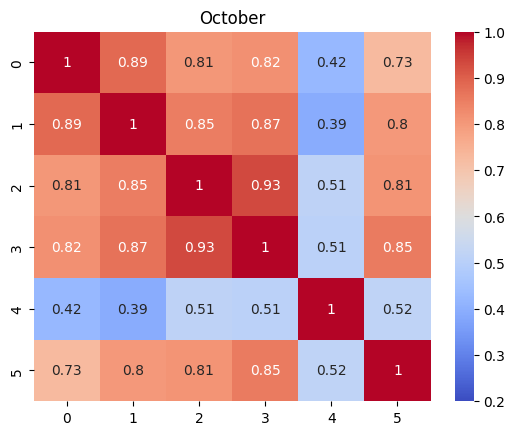

In [91]:
# October
cov_matrix = np.eye(6)
for i in range(6):
    for j in range(i+1, 6):
        seq1 = np.ma.masked_invalid(all_data[i][:24*31])
        seq2 = np.ma.masked_invalid(all_data[j][:24*31])
        cov_matrix[i, j] = np.ma.corrcoef(seq1, seq2)[0, 1]
        cov_matrix[j, i] = cov_matrix[i, j]

ax = sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', vmin=0.2, vmax=1)
plt.title("October")
plt.show()

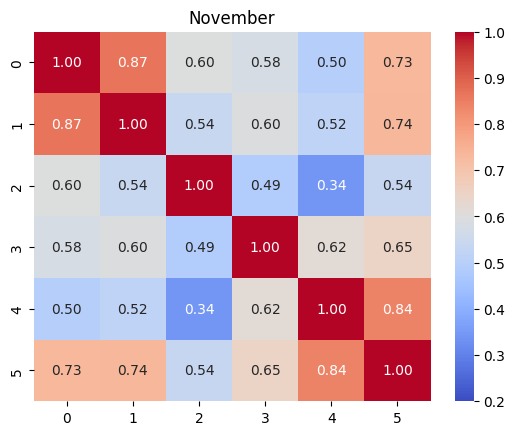

In [82]:
# November
cov_matrix = np.eye(6)
for i in range(6):
    for j in range(i+1, 6):
        seq1 = np.ma.masked_invalid(all_data[i][24*31:24*31+24*30])
        seq2 = np.ma.masked_invalid(all_data[j][24*31:24*31+24*30])
        cov_matrix[i, j] = np.ma.corrcoef(seq1, seq2)[0, 1]
        cov_matrix[j, i] = cov_matrix[i, j]

sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=0.2, vmax=1)
plt.title("November")
plt.show()

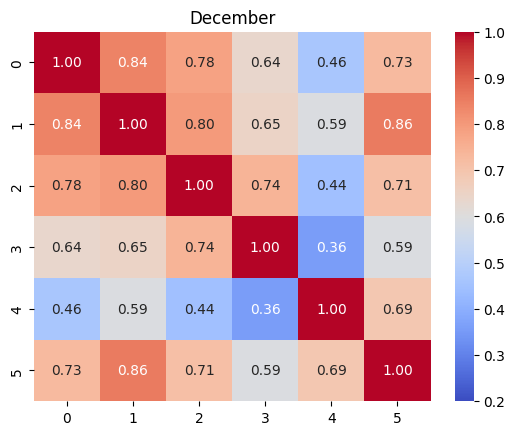

In [84]:
# December
cov_matrix = np.eye(6)
for i in range(6):
    for j in range(i+1, 6):
        seq1 = np.ma.masked_invalid(all_data[i][24*31+24*30:24*31+24*30+24*31])
        seq2 = np.ma.masked_invalid(all_data[j][24*31+24*30:24*31+24*30+24*31])
        cov_matrix[i, j] = np.ma.corrcoef(seq1, seq2)[0, 1]
        cov_matrix[j, i] = cov_matrix[i, j]

sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=0.2, vmax=1)
plt.title("December")
plt.show()

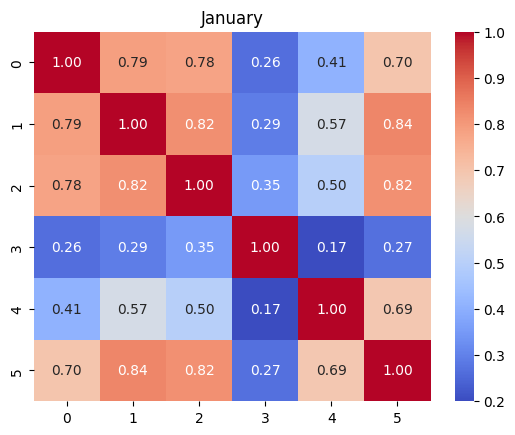

In [85]:
# January
cov_matrix = np.eye(6)
for i in range(6):
    for j in range(i+1, 6):
        seq1 = np.ma.masked_invalid(all_data[i][24*31+24*30+24*31:24*31+24*30+24*31+24*30])
        seq2 = np.ma.masked_invalid(all_data[j][24*31+24*30+24*31:24*31+24*30+24*31+24*30])
        cov_matrix[i, j] = np.ma.corrcoef(seq1, seq2)[0, 1]
        cov_matrix[j, i] = cov_matrix[i, j]

sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=0.2, vmax=1)
plt.title("January")
plt.show()